# 1. Data Curation

In [2]:
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# 1. Data Curation
# https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv", encoding='cp1252')

# 2. Data Inspection

In [3]:
print(df.shape)

df.describe(include='all')

(5105, 42)


,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,Death
count,5105,5103,5103,5102.000000,5099,5092,4932,4308,3556,5100,...,43,25,435,88,2466,5095,5105,5012,5027,5097
unique,5105,2098,2,NaN,3,11,370,84,26,222,...,5,1,134,1,2,5,374,289,226,2
top,16-0516,06/18/2017 12:00:00 AM,DateofDeath,NaN,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,...,Y,Y,PCP,Y,Y,Accident,"Hartford, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",No
freq,1,9,2822,NaN,3773,4004,296,1205,3442,563,...,39,25,48,88,2460,5066,379,296,1756,2906
mean,NaN,NaN,NaN,41.964916,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,12.336639,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# missing data
print(df.isnull().sum()) # check missing data

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3583
Fentanyl               2873
FentanylAnalogue       4715
Oxycodone              4496
Oxymorphone            4996
Ethanol                3857
Hydrocodone            4986
Benzodiazepine         3762
Methadone              4631
Amphet                 4945
Tramad                 4975
Morphine_NotHeroin     5062
Hydromorphone          5080
Other                  4670
OpiateNOS           

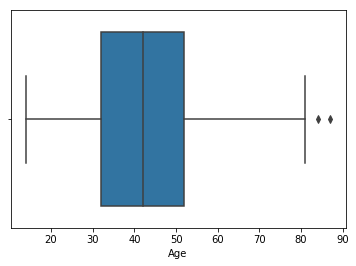

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Age'])
plt.show()

# 3. Data Preprocessing

## 1) Data Restructuring

In [7]:
# table vertical decomposition
# remove features do not affect on accidental drug with death
df.drop(['ID', 'Date', 'DateType', 'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
        'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 
         'COD', 'OtherSignifican', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo', 'MannerofDeath',
        'OpiateNOS', 'AnyOpioid'], 1, inplace=True)
print(df.head(5))

    Age     Sex          Race Heroin Cocaine Fentanyl FentanylAnalogue  \
0   NaN     NaN           NaN    NaN     NaN        Y              NaN   
1  48.0    Male         Black    NaN       Y      NaN              NaN   
2  30.0  Female         White      Y       Y      NaN              NaN   
3  23.0    Male         White      Y     NaN        Y              NaN   
4  22.0    Male  Asian, Other    NaN     NaN        Y              NaN   

  Oxycodone Oxymorphone Ethanol Hydrocodone Benzodiazepine Methadone Amphet  \
0       NaN         NaN     NaN           Y              Y       NaN    NaN   
1       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
2       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
3       NaN         NaN     NaN         NaN            NaN       NaN    NaN   
4       NaN         NaN     NaN         NaN            NaN       NaN    NaN   

  Tramad Morphine_NotHeroin Hydromorphone Other Death  
0    NaN                

## 2) Data Value Changes

* Cleaning dirty data

- missing data before -
Age                      3
Sex                      6
Race                    13
Heroin                2576
Cocaine               3583
Fentanyl              2873
FentanylAnalogue      4715
Oxycodone             4496
Oxymorphone           4996
Ethanol               3857
Hydrocodone           4986
Benzodiazepine        3762
Methadone             4631
Amphet                4945
Tramad                4975
Morphine_NotHeroin    5062
Hydromorphone         5080
Other                 4670
Death                    8
dtype: int64
- missing data after  -
Age                      3
Sex                      7
Race                    36
Heroin                2576
Cocaine               3583
Fentanyl              2873
FentanylAnalogue      4715
Oxycodone             4496
Oxymorphone           4996
Ethanol               3857
Hydrocodone           4986
Benzodiazepine        3762
Methadone             4631
Amphet                4945
Tramad                4975
Morphine_NotHeroin   

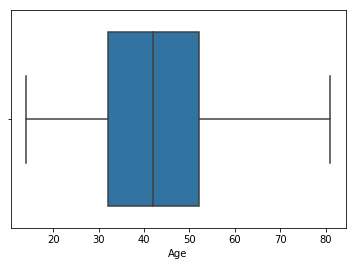

- missing data after -
Age                      0
Sex                      0
Race                     0
Heroin                2567
Cocaine               3575
Fentanyl              2868
FentanylAnalogue      4703
Oxycodone             4485
Oxymorphone           4984
Ethanol               3847
Hydrocodone           4975
Benzodiazepine        3752
Methadone             4620
Amphet                4933
Tramad                4963
Morphine_NotHeroin    5050
Hydromorphone         5068
Other                    0
Death                    0
dtype: int64


In [8]:
# Unusable data : replace 'Unknown' to NaN
print("- missing data before -")
print(df.isnull().sum()) # check missing data
df = df.replace('Unknown', np.nan)
print("- missing data after  -")
print(df.isnull().sum()) # check missing data

# Outliers
df = df[df['Age'] < 82]
sns.boxplot(df['Age'])
plt.show()

# Missing data : replace the NaN
df[['Age']] = df[['Age']].fillna(df[['Age']].mean()) #fill with mean
df[['Sex']] = df[['Sex']].fillna(method='bfill') #fill with bfill
df[['Race']] = df[['Race']].fillna(method='bfill') # fill with bfill
df[['Other']] = df[['Other']].replace(np.nan, '0') # replace 'Unknown' to 0
df = df.dropna(subset=['Death'])
print("- missing data after -")
print(df.isnull().sum()) # check missing data

* Text preprocessing

In [9]:
# tokenization
# Text tokenization the race
print(df['Race'].value_counts())
df['Race'] = df.Race.str.split(',').str[0] # 여러개의 인종이 있는 경우 앞에 있는 인종 선택
print('\n\n',df['Race'].value_counts())
# column value of df['Other']
listt = df['Other'].values.tolist()
listt = [listt for listt in listt if str(listt) != '0']

# Normalization
# 약물
print('- Before -\n')
print(df['Fentanyl'].value_counts())
print('\n',df['Morphine_NotHeroin'].value_counts())
print('\n',df['Other'].value_counts())
df[['Fentanyl']] = df[['Fentanyl']].replace(['Y-A', 'Y POPS', 'Y (PTCH)'], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'
df[['Morphine_NotHeroin']] = df[['Morphine_NotHeroin']].replace(['STOLE MEDS', 'YES', 'NO RX BUT STRAWS', 'PCP NEG'], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'
df[['Other']] = df[['Other']].replace([listt], 'Y') # replace 'Y-A', 'Y POPS', 'Y (PTCH)' to 'Y'
print('\n- After -\n')
print(df['Fentanyl'].value_counts())
print('\n',df['Morphine_NotHeroin'].value_counts())
print('\n',df['Other'].value_counts())

White                     4029
Hispanic, White            560
Black                      433
Hispanic, Black             24
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Hawaiian                     1
Native American, Other       1
Name: Race, dtype: int64


 White              4029
Hispanic            584
Black               433
Asian                18
Asian Indian         14
Other                11
Chinese               2
Hawaiian              1
Native American       1
Name: Race, dtype: int64
- Before -

Y           2221
Y-A            2
Y POPS         1
Y (PTCH)       1
Name: Fentanyl, dtype: int64

 Y                   39
YES                  1
PCP NEG              1
NO RX BUT STRAWS     1
STOLE MEDS           1
Name: Morphine_NotHeroin, dtype: int64

 0                        4659
PCP                        48
morphine                   29
HYDROMORPH                 28
Bupren                     25
BUPR

* Data Discretization (Binning)

In [10]:
# 나이 그룹짓기
# 영유아(0~5세) : 0
# 아동, 청소년(6~18세) : 1
# 청년(19~34세) : 2
# 중장년(35~64세) : 3
# 노인(65세~) : 4
df['Age_band'] = 0
df.loc[df['Age']<=5, 'Age_band'] = '0'
df.loc[(df['Age']>5)&(df['Age']<=18), 'Age_band'] = '1'
df.loc[(df['Age']>18)&(df['Age']<=34), 'Age_band'] = '2'
df.loc[(df['Age']>34)&(df['Age']<=64), 'Age_band'] = '3'
df.loc[df['Age']>64, 'Age_band'] = '4'

print(df['Age_band'].value_counts())

3    3328
2    1617
4     122
1      26
Name: Age_band, dtype: int64


* Encoding for data mining algorithms

In [11]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

# 0: Female, 1: Male
labelEncoder.fit(df['Sex'])
df['Sex'] = labelEncoder.transform(df['Sex'])

# 0: Asian, 1: Asian Indian, 2: Black, 3: Chinese, 4: Hawaiian, 5: Hispanic, 6: Hispanic American, 7: Other, 8: White
labelEncoder.fit(df['Race'])
df['Race'] = labelEncoder.transform(df['Race'])

# 0: No, 1: Yes
labelEncoder.fit(df['Death'])
df['Death'] = labelEncoder.transform(df['Death'])

# Drug's value change
df = df.replace('Y', 1) # replace 'Y' to 1
df = df.replace(np.nan, 0) # replace 'np.nan' to 0

## 3) Feature Engineering

In [12]:
# Feature Creation
# Deriving Features from Existing Features
df['Drug']=df.iloc[:, 3:18].sum(1) # the number of drugs taken by one person

print(df['Drug'].head(10))

1     1.0
2     2.0
3     2.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    2.0
Name: Drug, dtype: float64


In [13]:
df = df[['Sex', 'Race', 'Age_band', 'Drug', 'Death']]
# classifier attribute to target
feature = df.drop(columns=['Death'])
label = df['Death']

## 4) Normalization

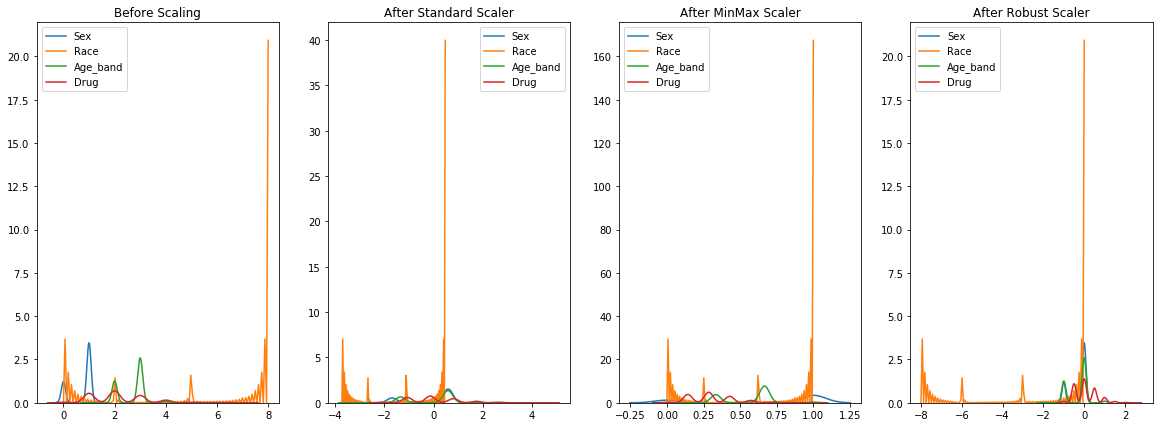

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandardScaler
standardscaler = StandardScaler()
Standardscaled = standardscaler.fit_transform(feature)
Standardscaled = pd.DataFrame(Standardscaled, columns=['Sex', 'Race', 'Age_band', 'Drug'])

# MinMaxScaler
MinMaxscaler = MinMaxScaler()
MinMaxscaled = MinMaxscaler.fit_transform(feature)
MinMaxscaled = pd.DataFrame(MinMaxscaled, columns=['Sex', 'Race', 'Age_band', 'Drug'])

# RobustScaler
Robustscaler = RobustScaler()
Robustscaled = Robustscaler.fit_transform(feature)
Robustscaled = pd.DataFrame(Robustscaled, columns=['Sex', 'Race', 'Age_band', 'Drug'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,7))

ax1.set_title('Before Scaling')
sns.kdeplot(feature['Sex'], ax=ax1)
sns.kdeplot(feature['Race'], ax=ax1)
sns.kdeplot(feature['Age_band'], ax=ax1)
sns.kdeplot(feature['Drug'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(Standardscaled['Sex'], ax=ax2)
sns.kdeplot(Standardscaled['Race'], ax=ax2)
sns.kdeplot(Standardscaled['Age_band'], ax=ax2)
sns.kdeplot(Standardscaled['Drug'], ax=ax2)

ax3.set_title('After MinMax Scaler')
sns.kdeplot(MinMaxscaled['Sex'], ax=ax3)
sns.kdeplot(MinMaxscaled['Race'], ax=ax3)
sns.kdeplot(MinMaxscaled['Age_band'], ax=ax3)
sns.kdeplot(MinMaxscaled['Drug'], ax=ax3)

ax4.set_title('After Robust Scaler')
sns.kdeplot(Robustscaled['Sex'], ax=ax4)
sns.kdeplot(Robustscaled['Race'], ax=ax4)
sns.kdeplot(Robustscaled['Age_band'], ax=ax4)
sns.kdeplot(Robustscaled['Drug'], ax=ax4)

plt.show()

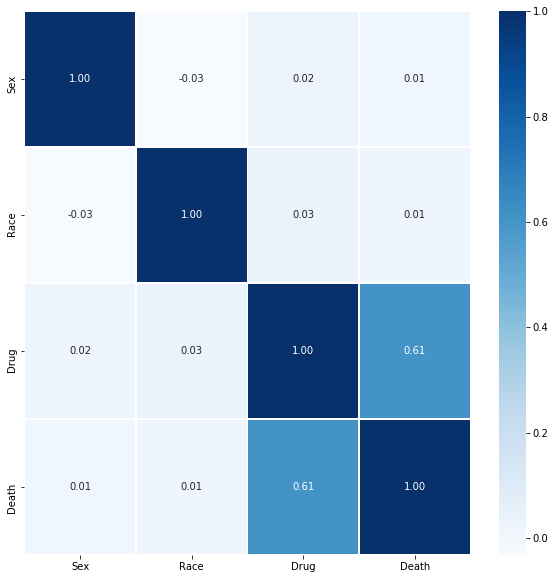

In [15]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 4. Data Analysis

In [16]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

feature = Robustscaled
X_train, X_test, y_train, y_test= train_test_split(feature, label, test_size=0.3, random_state=0)
print(X_train)

      Sex  Race  Age_band  Drug
1744  0.0   0.0       0.0   0.0
1507  0.0   0.0      -1.0  -0.5
1982  0.0  -6.0       0.0   0.5
1448 -1.0  -3.0       0.0  -0.5
4062  0.0   0.0       0.0   0.5
1615 -1.0   0.0       0.0  -0.5
2980  0.0  -6.0       0.0  -0.5
2513  0.0   0.0       0.0   0.5
2379  0.0   0.0      -1.0  -0.5
2357 -1.0   0.0      -1.0  -0.5
3247 -1.0   0.0      -1.0   0.5
4580 -1.0  -6.0       0.0  -0.5
841   0.0   0.0      -1.0  -0.5
4132  0.0   0.0      -1.0   0.5
4670  0.0   0.0       0.0  -0.5
3750  0.0   0.0       0.0  -0.5
4382 -1.0   0.0       0.0  -0.5
3769  0.0   0.0       0.0   0.0
3407  0.0   0.0      -1.0  -0.5
1404 -1.0   0.0      -1.0   0.0
3943  0.0   0.0       0.0   0.5
2964 -1.0   0.0       0.0  -0.5
4416 -1.0  -3.0      -1.0   0.0
1496  0.0   0.0       0.0   0.0
857   0.0   0.0       0.0  -0.5
4243 -1.0   0.0       0.0   0.0
2810  0.0   0.0      -1.0   0.0
1303  0.0   0.0      -1.0   0.0
925   0.0   0.0      -1.0  -0.5
2966 -1.0   0.0       0.0   0.0
...   ..

* Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# parameters of DecisionTreeClassifier
decision_param = {'criterion' : ['gini', 'entropy'],
                  'splitter' : ['best', 'random'],
                  'max_depth' : [1, 5, 10, 15],
                  'min_samples_split' : [2, 10, 20],
                  'min_samples_leaf' : [1, 5, 10],
                  'random_state' : [30, 50, 100],
                  'max_leaf_nodes' : [5, 10, 20, 30, 40, 50]}

# Create a Decision model
decision = DecisionTreeClassifier()

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_decision = GridSearchCV(decision, param_grid = decision_param, scoring = 'accuracy', cv = 5)

# Training Decision Tree GridSearchCV
grid_decision.fit(X_train, y_train)

# The highest score and the best parameter combination
print("* Decision Tree *")
print("Best Parameter :", grid_decision.best_estimator_) # return the best combination parameter
print("High Score :", grid_decision.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_decision = grid_decision.best_estimator_.predict(X_test)

* Decision Tree *
Best Parameter : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=30,
            splitter='random')
High Score : 0.8126227208976157


* Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# parameters of Logictic Regression
logistic_param = {'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter' : [50, 100, 200]}

# Create Logistic Regression model
logistic = LogisticRegression()

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_logistic = GridSearchCV(logistic, param_grid = logistic_param, scoring = 'accuracy', cv = 10)

# Training Decision Tree GridSearchCV
grid_logistic.fit(X_train, y_train)

# The highest score and the best parameter combination
print("* Logistic Regression *")
print("Best Parameter :", grid_logistic.best_estimator_) # return the best combination parameter
print("High Score :", grid_logistic.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_logistic = grid_logistic.best_estimator_.predict(X_test)

* Logistic Regression *
Best Parameter : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
High Score : 0.8115007012622721


# 5. Evaluation

## 1) Evaluation Methods

### - k-fold cross-validation

In [20]:
from sklearn.model_selection import cross_val_score

# Decision Tree
# Create a Decision model
decision = DecisionTreeClassifier()

# train model with cv of 10
cv_scores = cross_val_score(decision, feature, label, cv=10)

# print each cv score (accuracy) and average them
print('[Decision Tree]')
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

# Logistic Regression
# Create a Decision model
logistic = LogisticRegression()

# train model with cv of 10
cv_scores = cross_val_score(logistic, feature, label, cv=10)

# print each cv score (accuracy) and average them
print('\n[Logistic Regression]')
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[Decision Tree]
[0.69607843 0.81372549 0.84313725 0.80980392 0.79764244 0.80157171
 0.78781925 0.79960707 0.77013752 0.86614173]
cv_scores mean: 0.7985664826393408

[Logistic Regression]
[0.70196078 0.82156863 0.84901961 0.81372549 0.79764244 0.80157171
 0.79371316 0.80353635 0.77210216 0.86614173]
cv_scores mean: 0.8020982057411551


## 2) Ensemble Learning

### - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest
rf = RandomForestClassifier()

# parameters of RandomForestClassifier
rf_param = {'n_estimators' : [100, 200],
            'max_depth' : [6, 8, 10, 12],
            'min_samples_split' : [2, 3, 5, 10],
            'min_samples_leaf' : [3, 5, 7, 10]}

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_rf = GridSearchCV(rf, param_grid = rf_param, scoring = 'accuracy')

# Training Decision Tree GridSearchCV
grid_rf.fit(X_train, y_train)

# The highest score and the best parameter combination
print("* Random Forest *")
print("Best Parameter :", grid_rf.best_estimator_) # return the best combination parameter
print("High Score :", grid_rf.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

* Random Forest *
Best Parameter : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
High Score : 0.8120617110799438


### - Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting
gradient = GradientBoostingClassifier()

# parameters of GradientBoostingClassifier
gradient_param = {'n_estimators' : [100, 200],
                  'max_depth' : [6, 8, 10, 12],
                  'min_samples_split' : [2, 3, 5, 10],
                  'min_samples_leaf' : [3, 5, 7, 10],
                  'learning_rate' : [0.05, 0.1, 0.2]}

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_gradient = GridSearchCV(gradient, param_grid = gradient_param, scoring = 'accuracy')

# Training Decision Tree GridSearchCV
grid_gradient.fit(X_train, y_train)

# The highest score and the best parameter combination
print("* Gradient Boosting *")
print("Best Parameter :", grid_gradient.best_estimator_) # return the best combination parameter
print("High Score :", grid_gradient.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_gradient = grid_gradient.best_estimator_.predict(X_test)

* Gradient Boosting *
Best Parameter : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
High Score : 0.8095371669004208


### - AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Create a AdaBoost
adaboost = AdaBoostClassifier()

# parameters of AdaBoostClassifier
adaboost_param = {'n_estimators' : [100, 200],
                  'learning_rate' : [0.05, 0.1, 0.2]}

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_adaboost = GridSearchCV(adaboost, param_grid = adaboost_param, scoring = 'accuracy')

# Training Decision Tree GridSearchCV
grid_adaboost.fit(X_train, y_train)

# The highest score and the best parameter combination
print("* AdaBoost *")
print("Best Parameter :", grid_adaboost.best_estimator_) # return the best combination parameter
print("High Score :", grid_adaboost.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_adaboost = grid_adaboost.best_estimator_.predict(X_test)

* AdaBoost *
Best Parameter : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=100, random_state=None)
High Score : 0.8112201963534362


## 3) Evaluation Metrics

[Decision Tree]


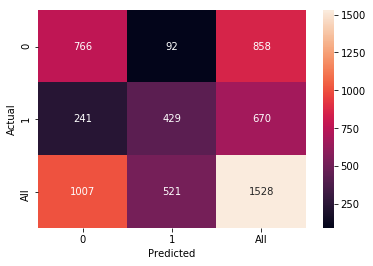

             precision    recall  f1-score   support

    class 0       0.76      0.89      0.82       858
    class 1       0.82      0.64      0.72       670

avg / total       0.79      0.78      0.78      1528


[Logistic Regression]


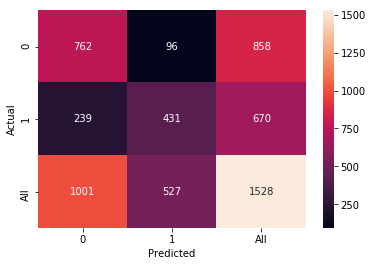

             precision    recall  f1-score   support

    class 0       0.76      0.89      0.82       858
    class 1       0.82      0.64      0.72       670

avg / total       0.79      0.78      0.78      1528


[Random Forest]


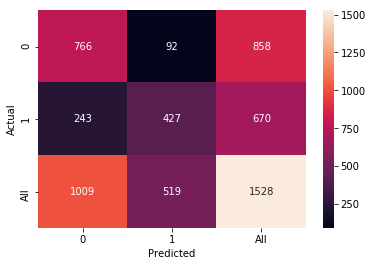

             precision    recall  f1-score   support

    class 0       0.76      0.89      0.82       858
    class 1       0.82      0.64      0.72       670

avg / total       0.79      0.78      0.78      1528


[Gradient Boosting]


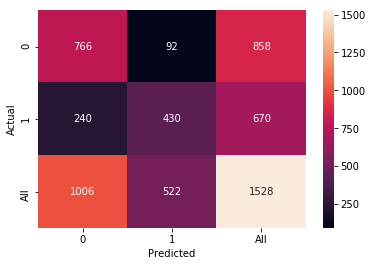

             precision    recall  f1-score   support

    class 0       0.76      0.89      0.82       858
    class 1       0.82      0.64      0.72       670

avg / total       0.79      0.78      0.78      1528


[AdaBoost]


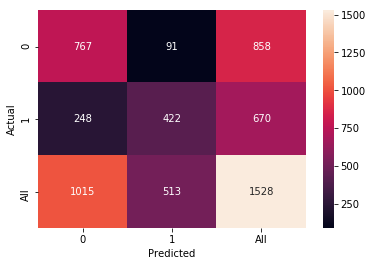

             precision    recall  f1-score   support

    class 0       0.76      0.89      0.82       858
    class 1       0.82      0.63      0.71       670

avg / total       0.79      0.78      0.77      1528



In [35]:
from sklearn.metrics import classification_report

# Decision Tree
# confusion matrix
print('[Decision Tree]')
confusion_matrix = pd.crosstab(y_test, y_pred_decision, rownames=['Actual'], colnames=['Predicted'], margins= True)
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()
# classification report
print(classification_report(y_test, y_pred_decision, target_names=['class 0', 'class 1']))

# Logistic Regression
# confusion matrix
print('\n[Logistic Regression]')
confusion_matrix = pd.crosstab(y_test, y_pred_logistic, rownames=['Actual'], colnames=['Predicted'], margins= True)
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()
# classification report
print(classification_report(y_test, y_pred_logistic, target_names=['class 0', 'class 1']))


# Random Forest
# confusion matrix
print('\n[Random Forest]')
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins= True)
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()
# classification report
print(classification_report(y_test, y_pred_rf, target_names=['class 0', 'class 1']))

# Gradient Boosting
# confusion matrix
print('\n[Gradient Boosting]')
confusion_matrix = pd.crosstab(y_test, y_pred_gradient, rownames=['Actual'], colnames=['Predicted'], margins= True)
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()
# classification report
print(classification_report(y_test, y_pred_gradient, target_names=['class 0', 'class 1']))

# AdaBoost
# confusion matrix
print('\n[AdaBoost]')
confusion_matrix = pd.crosstab(y_test, y_pred_adaboost, rownames=['Actual'], colnames=['Predicted'], margins= True)
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()
# classification report
print(classification_report(y_test, y_pred_adaboost, target_names=['class 0', 'class 1']))